In [4]:
%cd "NOAA project"

C:\Users\Elizabeth\repo\NOAA project


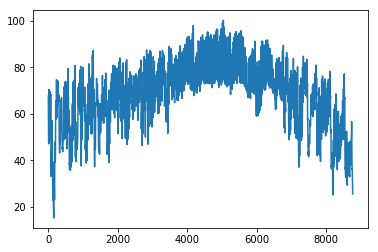

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
path = 'CRNH0203-201801010550\2016'
#for path in paths:
 #   C:\\Users\\Elizabeth\\repo\\NOAA project\\CRNH0203-201801010550\\2016
file = "TX_Austin_33_NW.txt"
test_file_df = pd.read_table(file,header=None, delim_whitespace = True )


header_str = "WBANNO UTC_DATE UTC_TIME LST_DATE LST_TIME CRX_VN LONGITUDE LATITUDE T_CALC T_HR_AVG T_MAX T_MIN P_CALC SOLARAD SOLARAD_FLAG SOLARAD_MAX SOLARAD_MAX_FLAG SOLARAD_MIN SOLARAD_MIN_FLAG SUR_TEMP_TYPE SUR_TEMP SUR_TEMP_FLAG SUR_TEMP_MAX SUR_TEMP_MAX_FLAG SUR_TEMP_MIN SUR_TEMP_MIN_FLAG RH_HR_AVG RH_HR_AVG_FLAG SOIL_MOISTURE_5 SOIL_MOISTURE_10 SOIL_MOISTURE_20 SOIL_MOISTURE_50 SOIL_MOISTURE_100 SOIL_TEMP_5 SOIL_TEMP_10 SOIL_TEMP_20 SOIL_TEMP_50 SOIL_TEMP_100"
headers =header_str.split(" ")
test_file_df.columns =headers 
test_file_df=test_file_df[test_file_df['T_MIN'] > -100]
test_file_df['T_MIN_F']=test_file_df['T_MIN']*9/5 +32

plt.plot(test_file_df["T_MIN_F"])
plt.show()

In [110]:
import os
import pandas as pd
import matplotlib.pyplot as plt
path = "CRNH0203-201801010550"
file_array=[]
directory = os.path.join("c:",path)
for root,dirs,files in os.walk(directory):
    
    for file in files:
        if file.endswith("NH_Durham_2_SSW.txt"):
            #print(file)
            file_dir= os.path.dirname(file)
            long_path = os.path.abspath(file)
            sub_direct = long_path[46:50]
            #print(sub_direct)
            new_path ="CRNH0203-201801010550\\" + sub_direct
            #print(new_path)
            file_name = new_path + "\\" + file 
            test_file_df = pd.read_table(file_name,header=None, delim_whitespace = True )
            header_str = "WBANNO UTC_DATE UTC_TIME LST_DATE LST_TIME CRX_VN LONGITUDE LATITUDE T_CALC T_HR_AVG T_MAX T_MIN P_CALC SOLARAD SOLARAD_FLAG SOLARAD_MAX SOLARAD_MAX_FLAG SOLARAD_MIN SOLARAD_MIN_FLAG SUR_TEMP_TYPE SUR_TEMP SUR_TEMP_FLAG SUR_TEMP_MAX SUR_TEMP_MAX_FLAG SUR_TEMP_MIN SUR_TEMP_MIN_FLAG RH_HR_AVG RH_HR_AVG_FLAG SOIL_MOISTURE_5 SOIL_MOISTURE_10 SOIL_MOISTURE_20 SOIL_MOISTURE_50 SOIL_MOISTURE_100 SOIL_TEMP_5 SOIL_TEMP_10 SOIL_TEMP_20 SOIL_TEMP_50 SOIL_TEMP_100"
            headers =header_str.split(" ")
            test_file_df.columns =headers 
            test_file_df=test_file_df[test_file_df['T_MIN'] > -100]
            test_file_df['T_MIN_F']=test_file_df['T_MIN']*9/5 +32
            # tag rows based on the threshold
            test_file_df['tag'] = test_file_df["T_MIN_F"] < 32

# first row is a True preceded by a False
            fst = test_file_df.index[test_file_df['tag'] & ~ test_file_df['tag'].shift(1).fillna(False)]

# last row is a True followed by a False
            lst = test_file_df.index[test_file_df['tag'] & ~ test_file_df['tag'].shift(-1).fillna(False)]

# filter those which are adequately apart
            pr = [(i, j) for i, j in zip(fst, lst) if j > i + 1]
            #print(sub_direct,pr)
            cum_freeze = 0
            max_freeze=0
            for dup in pr:
                cum_freeze += (dup[1] - dup[0])
                
                if (dup[1] - dup[0]) > max_freeze:
                    max_freeze = (dup[1] - dup[0])
                    
            print(sub_direct,cum_freeze,max_freeze)
            #plt.plot(test_file_df["T_MIN_F"])
            #plt.ylim(0,100)
            #plt.xlim(0,240)
            
#plt.show()
            

2001 223 66
2002 1886 116
2003 2391 523
2004 2165 455
2005 2299 350
2006 1822 183
2007 2335 235
2008 2186 139
2009 2192 334
2010 1865 304
2011 1992 221
2012 1709 117
2013 2116 213
2014 2148 223
2015 2237 673
2016 1849 165
2017 2001 186
2018 3 3


In [11]:
test_file_df
stat_decode_df = pd.read_csv('metadatasummary.csv',header=1)
stat_decode_df.dropna(axis = 0, how ='any', inplace=True)
stat_decode_df.drop_duplicates(inplace=True)
stat_decode_df.drop(stat_decode_df.index[1], inplace=True)


stat_decode_df


,StationId,Station,Date,Name,WBAN Number
0,1007,AK Barrow 4 ENE,20020810,NOAA (CMDL Observatory),27516
4,1798,AK Cordova 14 ESE,20170505,"Eyak Corporation, Cordova",96405
7,1793,AK Deadhorse 3 S,20140520,"AK Department of Natural Resources, Haul Road)",26565
10,1794,AK Denali 27 N,20150312,"NPS, Denali National Park (Wonder Lake Campgro...",96408
13,1008,AK Fairbanks 11 NE,20020809,NOAA / NESDIS (FCDAS),26494
20,1780,AK Gustavus 2 NE,20110817,"The Nature Conservancy, Gustavus Forelands Pre...",25380
23,1791,AK Ivotuk 1 NNE,20140519,"Arctic Slope Regional Corporation, Ivotuk Airs...",26564
26,1753,AK Kenai 29 ENE,20100817,Kenai National Wildlife Refuge (Kenai Moose Re...,26563
41,1754,AK Red Dog Mine 3 SSW,20100817,NANA Regional Corp Red Dog Mine,26655
44,1792,AK Ruby 44 ESE,20140519,"FWS, Nowitna National Wildlife Refuge (Lake Site)",96406


In [10]:

stat_decode_df = pd.read_csv('metadatasummary.csv',header=1)
stat_decode_df.dropna(axis = 0, how ='any', inplace=True)
stat_decode_df.drop_duplicates(inplace=True)
stat_decode_df.drop(stat_decode_df.index[1], inplace=True)
test_file_df['WBAN Number']= test_file_df['WBANNO']
 

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,CRX_VN,LONGITUDE,LATITUDE,T_CALC,T_HR_AVG,...,SOIL_MOISTURE_50,SOIL_MOISTURE_100,SOIL_TEMP_5,SOIL_TEMP_10,SOIL_TEMP_20,SOIL_TEMP_50,SOIL_TEMP_100,T_MIN_F,tag,WBAN Number
0,63856,20180101,100,20171231,2000,2.422,-81.46,30.81,7.1,7.1,...,0.071,0.066,12.1,12.4,12.8,14.3,17.2,44.78,False,63856
1,63856,20180101,200,20171231,2100,2.422,-81.46,30.81,7.3,7.2,...,0.070,0.067,11.8,12.4,12.7,14.3,17.4,44.78,False,63856
2,63856,20180101,300,20171231,2200,2.422,-81.46,30.81,7.3,7.3,...,0.070,0.068,11.7,12.3,12.8,14.4,17.4,44.96,False,63856
3,63856,20180101,400,20171231,2300,2.422,-81.46,30.81,7.1,7.2,...,0.071,0.064,11.6,12.2,12.7,14.4,17.4,44.78,False,63856


In [170]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
path = "CRNH0203-201801010550"
file_array=[]
directory = os.path.join("c:",path)
for root,dirs,files in os.walk(directory):
    file_array.append(files[:])
city_list=[]    
m=[]
unique_cities = set(x for l in file_array for x in l) 
for l in unique_cities:
    l = l[14:]     
    city_list.append(l)
city_list=set(city_list)
city_list.remove("")
city_list

results =[]
for city in city_list:
    for direct in paths:
        directory = os.path.join("c:",direct)
        for root,dirs,files in os.walk(directory):
            for file in files:
                if file.endswith(city):
                    data = os.path.join(directory,file)
                    test_file_df = pd.read_table(data,header=None, delim_whitespace = True )
                    header_str = "WBANNO UTC_DATE UTC_TIME LST_DATE LST_TIME CRX_VN LONGITUDE LATITUDE T_CALC T_HR_AVG T_MAX T_MIN P_CALC SOLARAD SOLARAD_FLAG SOLARAD_MAX SOLARAD_MAX_FLAG SOLARAD_MIN SOLARAD_MIN_FLAG SUR_TEMP_TYPE SUR_TEMP SUR_TEMP_FLAG SUR_TEMP_MAX SUR_TEMP_MAX_FLAG SUR_TEMP_MIN SUR_TEMP_MIN_FLAG RH_HR_AVG RH_HR_AVG_FLAG SOIL_MOISTURE_5 SOIL_MOISTURE_10 SOIL_MOISTURE_20 SOIL_MOISTURE_50 SOIL_MOISTURE_100 SOIL_TEMP_5 SOIL_TEMP_10 SOIL_TEMP_20 SOIL_TEMP_50 SOIL_TEMP_100"
                    headers = header_str.split(" ")
                    test_file_df.columns = headers
                    # Remove bad data points: 
                    test_file_df=test_file_df[test_file_df['T_MIN'] > -100]
                    # Convert to Fahrenheit:
                    test_file_df['T_MIN_F']=test_file_df['T_MIN']*9/5 +32
                    
                    # Test for continuous freeze condition:
                    # Tag rows based on the 32F threshold:
                    test_file_df['tag'] = test_file_df["T_MIN_F"] < 32

                    # First row is a True preceded by a False:
                    fst = test_file_df.index[test_file_df['tag'] & ~ test_file_df['tag'].shift(1).fillna(False)]

                    # Last row is a True followed by a False:
                    lst = test_file_df.index[test_file_df['tag'] & ~ test_file_df['tag'].shift(-1).fillna(False)]

                    # Filter those which are adequately (i.e. 3 data points) apart:
                    pr = [(i, j) for i, j in zip(fst, lst) if j > i + 2]                                        
                    cum_freeze = 0
                    max_freeze = 0
                    min_temp_list = test_file_df.sort_values("T_MIN_F")
                    min_temp = min_temp_list[1]
                    for dup in pr:
                        cum_freeze += (dup[1] - dup[0])
                        
                
                        if (dup[1] - dup[0]) > max_freeze:
                            max_freeze = (dup[1] - dup[0])
                            
                    result =[city[:-4],directory[24:28],cum_freeze,max_freeze,min_temp]   

                        
                    results.append(result)
                        
results 

KeyError: 1

In [82]:
no_alaska=[]
for result in results:
    if result[0][:2] != "AK":
        no_alaska.append(result)
    #print(result[0][:1])    
no_alaska    

[['CO_Grand_Junction_9_W', '2009', 859, 267],
 ['CO_Grand_Junction_9_W', '2010', 1816, 354],
 ['CO_Grand_Junction_9_W', '2011', 1563, 332],
 ['CO_Grand_Junction_9_W', '2012', 1255, 307],
 ['CO_Grand_Junction_9_W', '2013', 2080, 303],
 ['CO_Grand_Junction_9_W', '2014', 767, 207],
 ['AL_Selma_6_SSE', '2007', 100, 13],
 ['AL_Selma_6_SSE', '2008', 389, 19],
 ['AL_Selma_6_SSE', '2009', 344, 16],
 ['AL_Selma_6_SSE', '2010', 649, 39],
 ['AL_Selma_6_SSE', '2011', 309, 19],
 ['AL_Selma_6_SSE', '2012', 204, 14],
 ['AL_Selma_6_SSE', '2013', 276, 14],
 ['AL_Selma_6_SSE', '2014', 441, 58],
 ['AL_Selma_6_SSE', '2015', 322, 19],
 ['AL_Selma_6_SSE', '2016', 258, 14],
 ['AL_Selma_6_SSE', '2017', 162, 19],
 ['AL_Selma_6_SSE', '2018', 0, 0],
 ['OH_Coshocton_8_NNE', '2006', 214, 63],
 ['OH_Coshocton_8_NNE', '2007', 1737, 374],
 ['OH_Coshocton_8_NNE', '2008', 1870, 142],
 ['OH_Coshocton_8_NNE', '2009', 1716, 216],
 ['OH_Coshocton_8_NNE', '2010', 1993, 408],
 ['OH_Coshocton_8_NNE', '2011', 1550, 257],
 ['OH

In [244]:

Zone_list=["7A","7A","3B","3B","6B","6B","5B","5B","8A","8A","7A","5B","9B","4A","8A","8B","5B","7A","4B","5B","5B","8B","8B","8A","8A","6A","6B","7B","8B","4B","4B","5B","4A","6A","5A","9A","6B","5B","6A","8B","5B","3B","9B","6B","5A","9A","9A","4A","6A","4B","8A","9B","6B","4A","6B","4B","8B","5B","7A","6B","5B","5A","8A","6A","5B","6B","4B","6A","8B","4A","7B","8A","6A","12B","5B","6A","7B","7B","8B","9B","3B","8A","8B","6A","8B","7A","7B","5A","7B","7B","7B","10A","6A","8B","3B","4B","6B","6B","10B","4B","7B","8A","6A","9B","6B","8A","7A","4A","4B","6B","8A","8A","8A","8A","7B","10A","8A","7A","6B","8A","8A","4A","9B","8B","7B","4B","10B","7B","9B","8A","10A","6A"]
freeze_df=pd.DataFrame(no_alaska,columns=['City','Year','Total_Freeze_Time','Max_Extended_Freeze_Time'])
summary= freeze_df['City'].value_counts()
summary_df=pd.DataFrame(summary).reset_index() 
summary_df.rename(columns={"index":"City","City":"Count"}, inplace = True)
summary_df=pd.concat([summary_df,zone_list_df],axis = 1)
summary_df.rename(columns={0:"USDA Zone Historical"},inplace = True )
filtered_df=summary_df[summary_df["Count"] >10] 

freeze_df

,City,Year,Total_Freeze_Time,Max_Extended_Freeze_Time
0,CO_Grand_Junction_9_W,2009,859,267
1,CO_Grand_Junction_9_W,2010,1816,354
2,CO_Grand_Junction_9_W,2011,1563,332
3,CO_Grand_Junction_9_W,2012,1255,307
4,CO_Grand_Junction_9_W,2013,2080,303
5,CO_Grand_Junction_9_W,2014,767,207
6,AL_Selma_6_SSE,2007,100,13
7,AL_Selma_6_SSE,2008,389,19
8,AL_Selma_6_SSE,2009,344,16
9,AL_Selma_6_SSE,2010,649,39


In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
paths = (glob.glob("CRNH0203-201801010550\\*"))
paths = paths[:-2]
city_list = ["TX_Austin_33_NW.txt","Brunswick_23_S.txt"]
results =[]
for city in city_list:
    for direct in paths:
        directory = os.path.join("c:",direct)
        for root,dirs,files in os.walk(directory):
            for file in files:
                if file.endswith(city):
                    data = os.path.join(directory,file)
                    test_file_df = pd.read_table(data,header=None, delim_whitespace = True )
                    header_str = "WBANNO UTC_DATE UTC_TIME LST_DATE LST_TIME CRX_VN LONGITUDE LATITUDE T_CALC T_HR_AVG T_MAX T_MIN P_CALC SOLARAD SOLARAD_FLAG SOLARAD_MAX SOLARAD_MAX_FLAG SOLARAD_MIN SOLARAD_MIN_FLAG SUR_TEMP_TYPE SUR_TEMP SUR_TEMP_FLAG SUR_TEMP_MAX SUR_TEMP_MAX_FLAG SUR_TEMP_MIN SUR_TEMP_MIN_FLAG RH_HR_AVG RH_HR_AVG_FLAG SOIL_MOISTURE_5 SOIL_MOISTURE_10 SOIL_MOISTURE_20 SOIL_MOISTURE_50 SOIL_MOISTURE_100 SOIL_TEMP_5 SOIL_TEMP_10 SOIL_TEMP_20 SOIL_TEMP_50 SOIL_TEMP_100"
                    headers =header_str.split(" ")
                    test_file_df.columns =headers
                    # Remove bad data points: 
                    test_file_df=test_file_df[test_file_df['T_MIN'] > -100]
                    # Convert to Fahrenheit:
                    test_file_df['T_MIN_F']=test_file_df['T_MIN']*9/5 +32
test_file_df

,WBANNO,UTC_DATE,UTC_TIME,LST_DATE,LST_TIME,CRX_VN,LONGITUDE,LATITUDE,T_CALC,T_HR_AVG,...,SOIL_MOISTURE_10,SOIL_MOISTURE_20,SOIL_MOISTURE_50,SOIL_MOISTURE_100,SOIL_TEMP_5,SOIL_TEMP_10,SOIL_TEMP_20,SOIL_TEMP_50,SOIL_TEMP_100,T_MIN_F
0,63856,20180101,100,20171231,2000,2.422,-81.46,30.81,7.1,7.1,...,0.102,0.109,0.071,0.066,12.1,12.4,12.8,14.3,17.2,44.78
1,63856,20180101,200,20171231,2100,2.422,-81.46,30.81,7.3,7.2,...,0.104,0.107,0.070,0.067,11.8,12.4,12.7,14.3,17.4,44.78
2,63856,20180101,300,20171231,2200,2.422,-81.46,30.81,7.3,7.3,...,0.103,0.108,0.070,0.068,11.7,12.3,12.8,14.4,17.4,44.96
3,63856,20180101,400,20171231,2300,2.422,-81.46,30.81,7.1,7.2,...,0.105,0.108,0.071,0.064,11.6,12.2,12.7,14.4,17.4,44.78


In [ ]:
{'CO_Grand_Junction_9_W.txt', 'AL_Selma_6_SSE.txt', 'OH_Coshocton_8_NNE.txt', 'NV_Denio_52_WSW.txt', 'NE_Whitman_5_ENE.txt', 'AK_St._Paul_4_NE.txt', 'TX_Panther_Junction_2_N.txt', 'AL_Courtland_2_WSW.txt', 'NE_Harrison_20_SSE.txt', 'AK_Barrow_4_ENE.txt', 'UT_Grantsville_12_WNW.txt', 'OK_Goodwell_2_E.txt', 'UT_St._George_15_NE.txt', 'AK_Cordova_14_ESE.txt', 'CA_Merced_23_WSW.txt', 'MT_Wolf_Point_29_ENE.txt', 'IL_Champaign_9_SW.txt', 'GA_Newton_8_W.txt', 'MT_Lewistown_42_WSW.txt', 'NM_Hagerman_10_ESE.txt', 'AL_Fairhope_3_NE.txt', 'MI_Gaylord_9_SSW.txt', 'NM_Taos_27_NW.txt', 'AZ_Tsaile_1_SSW.txt', 'PA_Avondale_2_N.txt', 'AL_Guntersville_2_SW.txt', 'OK_Goodwell_2_SE.txt', 'AZ_Bowie_23_SSE.txt', 'FL_Titusville_7_E.txt', 'NM_Ramah_9_SE.txt', 'AR_Batesville_8_WNW.txt', 'AZ_Meadview_7_N.txt', 'UT_Monticello_24_NW.txt', 'ID_Arco_17_SW.txt', 'UT_Delta_4_NE.txt', 'AK_Deadhorse_3_S.txt', 'NM_Socorro_20_N.txt', 'AL_Cullman_3_ENE.txt', 'CO_Saguache_2_WNW.txt', 'SD_Buffalo_13_ESE.txt', 'UT_Blanding_26_SSW.txt', 'ND_Medora_7_E.txt', 'UT_Tropic_9_SE.txt', 'RI_Kingston_1_W.txt', 'NC_Asheville_8_SSW.txt', 'ND_Jamestown_38_WSW.txt', 'AL_Gadsden_19_N.txt', 'MO_Chillicothe_22_ENE.txt', 'CO_Eads_16_ENE.txt', 'SD_Sioux_Falls_14_NNE.txt', 'AZ_Williams_35_NNW.txt', 'TX_Bronte_11_NNE.txt', 'UT_Bluff_32_NW.txt', 'UT_Price_3_E.txt', 'NH_Durham_2_SSW.txt', 'AL_Troy_2_W.txt', 'AL_Selma_13_WNW.txt', 'AZ_Holbrook_17_ESE.txt', 'AK_Selawik_28_E.txt', 'AZ_Kingman_8_NE.txt', 'TX_Palestine_6_WNW.txt', 'LA_Lafayette_13_SE.txt', 'NM_Carrizozo_1_W.txt', 'CO_Buena_Vista_2_SSE.txt', 'AK_Metlakatla_6_S.txt', 'MI_Chatham_1_SE.txt', 'CO_Colorado_Springs_23_NW.txt', 'MS_Holly_Springs_4_N.txt', 'AK_Sitka_1_NE.txt', 'AK_Glennallen_64_N.txt', 'AL_Talladega_10_NNE.txt', 'SD_Pierre_24_S.txt', 'NE_Lincoln_11_SW.txt', 'OH_Wooster_3_SSE.txt', 'IA_Des_Moines_17_E.txt', 'WA_Quinault_4_NE.txt', 'MS_Newton_5_ENE.txt', 'AL_Northport_2_S.txt', 'AZ_Camp_Verde_3_N.txt', 'NY_Ithaca_13_E.txt', 'AK_Denali_27_N.txt', 'UT_Spanish_Valley_25_SW.txt', 'AZ_Cameron_25_SSE.txt', 'AK_King_Salmon_42_SE.txt', 'NV_Baker_5_W.txt', 'CO_Akron_A_4_E.txt', 'CO_Woodland_Park_14_WSW.txt', 'NC_Asheville_13_S.txt', 'NM_Los_Alamos_13_W.txt', 'UT_Manila_18_ESE.txt', 'OR_Coos_Bay_8_SW.txt', 'CA_Santa_Barbara_11_W.txt', 'FL_Everglades_City_5_NE.txt', 'TX_Monahans_6_ENE.txt', 'UT_Provo_22_E.txt', 'GA_Watkinsville_5_SSE.txt', 'KY_Versailles_3_NNW.txt', 'TN_Crossville_7_NW.txt', 'TX_Port_Aransas_32_NNE.txt', 'RI_Kingston_1_NW.txt', 'AZ_Gila_Bend_3_ENE.txt', 'GA_Brunswick_23_S.txt', 'NY_Millbrook_3_W.txt', 'WY_Sundance_8_NNW.txt', 'CA_Fallbrook_5_NE.txt', 'NM_Raton_26_ESE.txt', 'ID_Murphy_10_W.txt', 'AZ_Coolidge_5_W.txt', 'AK_Port_Alsworth_1_SW.txt', 'WA_Darrington_21_NNE.txt', 'NM_Socorro_17_WSW.txt', 'MN_Sandstone_6_W.txt', 'UT_Milford_42_WNW.txt', 'WI_Necedah_5_WNW.txt', 'NM_Clovis_7_N.txt', 'AZ_Lake_Havasu_City_19_SE.txt', 'NM_Hachita_7_ESE.txt', 'UT_Midway_3_NE.txt', 'CO_Nunn_7_NNE.txt', 'AL_Greensboro_2_WNW.txt', 'CO_Cortez_8_SE.txt', 'WY_Lander_11_SSE.txt', 'AL_Thomasville_2_S.txt', 'SA_Tiksi_4_SSE.txt', 'NM_Clayton_3_ENE.txt', 'AL_Highland_Home_2_S.txt', 'AZ_Heber_3_SE.txt', 'CO_Craig_30_N.txt', 'NM_Elida_14_SW.txt', 'NM_Santa_Fe_20_WNW.txt', 'CO_Kim_9_WSW.txt', 'TX_Muleshoe_19_S.txt', 'UT_Beaver_15_E.txt', 'MO_Salem_10_W.txt', 'AL_Brewton_3_NNE.txt', 'WV_Elkins_21_ENE.txt', 'CA_Yosemite_Village_12_W.txt', 'MO_Joplin_24_N.txt', 'UT_Brigham_City_28_WNW.txt', 'VA_Cape_Charles_5_ENE.txt', 'AK_Red_Dog_Mine_3_SSW.txt', 'NV_Mercury_3_SSW.txt', 'UT_Torrey_7_E.txt', 'UT_Vernal_23_SSE.txt', 'CO_Genoa_35_N.txt', 'AK_Yakutat_3_SSE.txt', 'KS_Manhattan_6_SSW.txt', 'OR_Riley_10_WSW.txt', 'IL_Shabbona_5_NNE.txt', 'NM_Las_Vegas_6_NE.txt', 'NM_Mountainair_2_WSW.txt', 'ND_Northgate_5_ESE.txt', 'ON_Egbert_1_W.txt', 'NE_Lincoln_8_ENE.txt', 'AL_Russellville_4_SSE.txt', 'NM_Nageezi_18_SSW.txt', 'WA_Spokane_17_SSW.txt', 'CO_Montrose_11_ENE.txt', 'HI_Hilo_5_S.txt', 'UT_Mexican_Hat_10_NW.txt', 'UT_Cedar_City_18_SSE.txt', 'GA_Newton_11_SW.txt', 'LA_Monroe_26_N.txt', 'OK_Stillwater_2_W.txt', 'MT_Dillon_18_WSW.txt', 'OR_John_Day_35_WNW.txt', 'KS_Oakley_19_SSW.txt', 'SD_Aberdeen_35_WNW.txt', 'AZ_Whiteriver_A_1_SW.txt', 'NH_Durham_2_N.txt', 'VA_Charlottesville_2_SSE.txt', 'CO_Meeker_15_W.txt', 'CA_Stovepipe_Wells_1_SW.txt', 'OR_Corvallis_10_SSW.txt', 'TX_Austin_33_NW.txt', 'AZ_Phoenix_7_S.txt', 'AK_Kenai_29_ENE.txt', 'AK_Toolik_Lake_5_ENE.txt', 'AZ_Page_9_WSW.txt', 'AK_Ivotuk_1_NNE.txt', 'AZ_Tucson_11_W.txt', 'MN_Goodridge_12_NNW.txt', 'AK_Sand_Point_1_ENE.txt', 'AL_Clanton_2_NE.txt', 'AL_Muscle_Shoals_2_N.txt', 'AZ_Safford_5_NNE.txt', 'NM_Mills_6_WSW.txt', 'CO_Center_A_4_SSW.txt', 'ME_Limestone_4_NNW.txt', 'AL_Gainesville_2_NE.txt', 'CO_Rocky_Ford_1_ESE.txt', 'MT_Wolf_Point_34_NE.txt', 'CO_Dinosaur_2_E.txt', 'CA_Bodega_6_WSW.txt', 'FL_Sebring_23_SSE.txt', 'CO_Stratton_24_N.txt', 'CA_Redding_12_WNW.txt', 'AZ_Ajo_29_S.txt', 'AZ_Yuma_27_ENE.txt', 'AL_Scottsboro_2_NE.txt', 'NM_Vaughn_36_SSE.txt', 'AK_Fairbanks_11_NE.txt', 'AK_Ruby_44_ESE.txt', 'WY_Moose_1_NNE.txt', 'NM_Aztec_43_E.txt', 'CO_Springfield_6_WSW.txt', 'NM_Pinon_8_SSE.txt', 'NM_Reserve_1_W.txt', 'NM_Las_Cruces_20_N.txt', 'AK_Gustavus_2_NE.txt', 'IN_Bedford_5_WNW.txt', 'CO_Rifle_23_NW.txt', 'AZ_Elgin_5_S.txt', 'SC_McClellanville_7_NE.txt', 'OK_Stillwater_5_WNW.txt', 'HI_Mauna_Loa_5_NNE.txt', 'TX_Edinburg_17_NNE.txt', 'CO_Eagle_13_SSE.txt', 'KY_Bowling_Green_21_NNE.txt', 'SC_Blackville_3_W.txt', 'AK_Tok_70_SE.txt', 'MT_St._Mary_1_SSW.txt', 'CO_Boulder_14_W.txt', 'ME_Old_Town_2_W.txt', 'AZ_Kayenta_16_WSW.txt', 'AZ_Fredonia_7_SSE.txt', 'NM_Artesia_2_WNW.txt', 'AZ_Amado_23_W.txt', 'NM_Grants_2_S.txt', 'AL_Valley_Head_1_SSW.txt', 'NC_Durham_11_W.txt', 'CO_La_Junta_17_WSW.txt'}

In [328]:
# Dependencies:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np

# Find list of unique cities in text files downloaded from NOAA:
path = "CRNH0203-201801010550"
file_array=[]
directory = os.path.join("c:",path)
for root,dirs,files in os.walk(directory):
    file_array.append(files[:])
city_list=[]    

unique_cities = set(x for l in file_array for x in l) 
for l in unique_cities:
    l = l[14:]     
    city_list.append(l)
city_list=set(city_list)

# Clean city list nulls:
city_list.remove("")

# Perform queries and calculations on text files downloaded from NOAA:
city_list=list(city_list)

results =[]
# Hand generated USDA zone dict:
usda={"1A":range(-60,-55),"1B":range(-55,-50),"2A":range(-50,-45),"2B":range(-45,-40),"3A":range(-40,-35),"3B":range(-35,-30),\
                      "4A":range(-30,-25),"4B":range(-25,-20),"5A":range(-20,-15),"5B":range(-15,-10),"6A":range(-10,-5),"6B":range(-5,0),\
                      "7A":range(0,5),"7B":range(5,10),"8A":range(10,15),"8B":range(15,20),"9A":range(20,25),"9B":range(25,30),"10A":range(30,35),\
                      "10B":range(35,40),"11A":range(40,45),"11B":range(45,50),"12A":range(50,55),"12B":range(55,60),"13A":range(60,65),"13B":range(65,70)}

usda_actual =''
for city in city_list:
    for direct in paths:
        directory = os.path.join("c:",direct)
        for root,dirs,files in os.walk(directory):
            for file in files:
                if file.endswith(city):
                    data = os.path.join(directory,file)
                    test_file_df = pd.read_table(data,header=None, delim_whitespace = True )
                    header_str = "WBANNO UTC_DATE UTC_TIME LST_DATE LST_TIME CRX_VN LONGITUDE LATITUDE T_CALC T_HR_AVG T_MAX T_MIN P_CALC SOLARAD SOLARAD_FLAG SOLARAD_MAX SOLARAD_MAX_FLAG SOLARAD_MIN SOLARAD_MIN_FLAG SUR_TEMP_TYPE SUR_TEMP SUR_TEMP_FLAG SUR_TEMP_MAX SUR_TEMP_MAX_FLAG SUR_TEMP_MIN SUR_TEMP_MIN_FLAG RH_HR_AVG RH_HR_AVG_FLAG SOIL_MOISTURE_5 SOIL_MOISTURE_10 SOIL_MOISTURE_20 SOIL_MOISTURE_50 SOIL_MOISTURE_100 SOIL_TEMP_5 SOIL_TEMP_10 SOIL_TEMP_20 SOIL_TEMP_50 SOIL_TEMP_100"
                    headers =header_str.split(" ")
                    test_file_df.columns =headers
                    # Remove bad data points: 
                    test_file_df=test_file_df[test_file_df['T_MIN'] > -100]
                    # Convert to temps to Fahrenheit:
                    test_file_df['T_MIN_F']=test_file_df['T_MIN']*9/5 +32

                     # Tag rows based on the 32F threshold:
                    test_file_df['tag'] = test_file_df["T_MIN_F"] < 32

                    # First row is a True preceded by a False:
                    fst = test_file_df.index[test_file_df['tag'] & ~ test_file_df['tag'].shift(1).fillna(False)]

                    # Last row is a True followed by a False:
                    lst = test_file_df.index[test_file_df['tag'] & ~ test_file_df['tag'].shift(-1).fillna(False)]

                    # Filter those which are adequately (i.e. 3 data points) apart:
                    pr = [(i, j) for i, j in zip(fst, lst) if j > i + 2]
                    
                    cum_freeze = 0
                    max_freeze = 0
                    min_temp_df = test_file_df.sort_values("T_MIN_F").head(1)
                    try:
                        min_temp=min_temp_df.loc[:,'T_MIN_F'].values[0]
                    except IndexError as e:
                        min_temp=="NA"
                    
                    # Find actual zone for year:
                    for key in usda:
                        if int(min_temp) in (usda[key]):
                            usda_actual=key

                    # Look for extended freezes:        
                    for dup in pr:
                        cum_freeze += (dup[1] - dup[0])
                        
                
                        if (dup[1] - dup[0]) > max_freeze:
                            max_freeze = (dup[1] - dup[0])
                     
                    # Pack results in a list:
                    result =[city[:-4],directory[24:28],cum_freeze,max_freeze,len(pr),int(min_temp),usda_actual]   
                    
                    # Append array for city and year:
                    results.append(result)
                         

# Remove Alaska data for simpler analysis:
no_alaska=[]
for result in results:
    if result[0][:2] != "AK":
        no_alaska.append(result)

# Downloaded list from USDA:
zone_df=pd.read_csv("zone_historical.csv")
#Zone_list=["7A","7A","3B","3B","6B","6B","5B","5B","8A","8A","7A","5B","9B","4A","8A","8B","5B","7A","4B","5B","5B","8B","8B","8A","8A","6A","6B","7B","8B","4B","4B","5B","4A","6A","5A","9A","6B","5B","6A","8B","5B","3B","9B","6B","5A","9A","9A","4A","6A","4B","8A","9B","6B","4A","6B","4B","8B","5B","7A","6B","5B","5A","8A","6A","5B","6B","4B","6A","8B","4A","7B","8A","6A","12B","5B","6A","7B","7B","8B","9B","3B","8A","8B","6A","8B","7A","7B","5A","7B","7B","7B","10A","6A","8B","3B","4B","6B","6B","10B","4B","7B","8A","6A","9B","6B","8A","7A","4A","4B","6B","8A","8A","8A","8A","7B","10A","8A","7A","6B","8A","8A","4A","9B","8B","7B","4B","10B","7B","9B","8A","10A","6A"]
#zone_list_df = pd.DataFrame(Zone_list)
freeze_df=pd.DataFrame(no_alaska,columns=['City','Year','Total_Freeze_Time','Max_Extended_Freeze_Time',"Number of Extended Freezes","Minimum_Temperature","USDA Zone Measured"])

# Remove limited 2018 data:
freeze_df=freeze_df[freeze_df['Year'] !='2018']

# Filter out stations with less than 10 years data:
summary= freeze_df['City'].value_counts()
summary_df=pd.DataFrame(summary).reset_index() 
summary_df.rename(columns={"index":"City","City":"Count"}, inplace = True)
filtered_df=summary_df[summary_df["Count"] > 9] 
report_df=pd.concat([filtered_df,zone_list_df],axis = 1)
report_df.rename(columns={0:"USDA Zone Historical"},inplace = True )


freeze_df        
 

,City,Year,Total_Freeze_Time,Max_Extended_Freeze_Time,Number of Extended Freezes,Minimum_Temperature,USDA Zone Measured
0,CO_Grand_Junction_9_W,2009,859,267,19,3,7A
1,CO_Grand_Junction_9_W,2010,1816,354,58,3,7A
2,CO_Grand_Junction_9_W,2011,1563,332,59,-3,6B
3,CO_Grand_Junction_9_W,2012,1255,307,61,6,7B
4,CO_Grand_Junction_9_W,2013,2080,303,58,0,7A
5,CO_Grand_Junction_9_W,2014,767,207,27,11,8A
6,AL_Selma_6_SSE,2007,100,13,12,21,9A
7,AL_Selma_6_SSE,2008,389,19,47,15,8B
8,AL_Selma_6_SSE,2009,344,16,35,15,8B
9,AL_Selma_6_SSE,2010,649,39,60,12,8A


In [453]:
test_df=pd.merge(filtered_df,zone_df, on='City')
final_df=pd.merge(test_df,freeze_df, on='City')
final_df=final_df[final_df['Year'] != '2000']
eight_b_df = final_df[final_df["USDA Zone Historical"] == '8B']
eight_b_group_df = eight_b_df.groupby('City')
tot_fr_df = eight_b_group_df['Total_Freeze_Time'].agg(["mean","std"]).reset_index().rename(columns={'mean':'Total Freeze Time (mean)',"std":'Total Freeze Time (stdev)'}).round(0)
max_fr_df = eight_b_group_df['Max_Extended_Freeze_Time'].agg(["mean","std"]).reset_index().rename(columns={'mean':'Max Extended Freeze Time (mean)',"std":'Max Extended Freeze Time (stdev)'}).round(0)
min_temp_df = eight_b_group_df['Minimum_Temperature'].agg(["mean","std"]).reset_index().rename(columns={'mean':'Min Temperature (mean)',"std":'Min Temperature (stdev)'}).round(0)
nr_fr_df = eight_b_group_df['Number of Extended Freezes'].agg(["mean","std"]).reset_index().rename(columns={'mean':'Number of Extended Freezes (mean)',"std":'Number of Extended Freezes (stdev)'}).round(0)
merged_df = pd.merge(tot_fr_df ,max_fr_df)
merged_df = pd.merge(merged_df,min_temp_df)
merged_df = pd.merge(merged_df,nr_fr_df)
merged_df.to_csv('final_8B_table.csv')
merged_df



,City,Total Freeze Time (mean),Total Freeze Time (stdev),Max Extended Freeze Time (mean),Max Extended Freeze Time (stdev),Min Temperature (mean),Min Temperature (stdev),Number of Extended Freezes (mean),Number of Extended Freezes (stdev)
0,AL_Fairhope_3_NE,151.0,97.0,17.0,9.0,19.0,3.0,19.0,10.0
1,GA_Newton_11_SW,144.0,92.0,15.0,7.0,20.0,3.0,18.0,10.0
2,GA_Newton_8_W,225.0,103.0,16.0,7.0,18.0,3.0,27.0,10.0
3,LA_Monroe_26_N,441.0,106.0,33.0,15.0,16.0,3.0,42.0,8.0
4,NV_Mercury_3_SSW,223.0,98.0,21.0,14.0,19.0,3.0,27.0,10.0
5,OR_Corvallis_10_SSW,387.0,172.0,69.0,51.0,16.0,6.0,31.0,11.0
6,SC_McClellanville_7_NE,116.0,83.0,19.0,12.0,22.0,4.0,12.0,7.0
7,TX_Austin_33_NW,146.0,88.0,43.0,19.0,18.0,4.0,11.0,5.0
8,TX_Palestine_6_WNW,170.0,70.0,32.0,23.0,18.0,4.0,18.0,5.0
9,TX_Panther_Junction_2_N,153.0,72.0,29.0,17.0,19.0,5.0,17.0,6.0


In [447]:
# Prepare data for plots:
cities_8b=[]
cities_8b_long = list(merged_df['City'])

for city in cities_8b_long:
    cities_8b.append(city[:-4])
tot_fr_8b = list(merged_df['Total Freeze Time (mean)'])
tot_fr_sd_8b = list(merged_df['Total Freeze Time (stdev)'])
max_ext_fr_8b = list(merged_df["Max Extended Freeze Time (mean)"])
max_ext_fr_sd_8b = list(merged_df["Max Extended Freeze Time (stdev)"])
min_temp_8b = list(merged_df["Min Temperature (mean)"])
min_temp_sd_8b = list(merged_df["Min Temperature (stdev)"])
no_ext_fr_8b = list(merged_df['Number of Extended Freezes (mean)'])
no_ext_fr_sd_8b = list(merged_df['Number of Extended Freezes (stdev)'])
cities_8b

['AL_Fairhope_',
 'GA_Newton_1',
 'GA_Newton',
 'LA_Monroe_',
 'NV_Mercury_3',
 'OR_Corvallis_10',
 'SC_McClellanville_',
 'TX_Austin_3',
 'TX_Palestine_6',
 'TX_Panther_Junction',
 'WA_Quinault_']

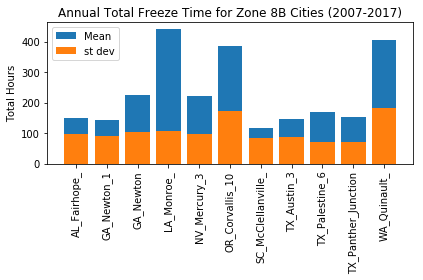

In [448]:


x=np.arange(len(cities_8b))

ax = plt.subplot()
ax.bar(x,tot_fr_8b,label='Mean')
ax.bar(x,tot_fr_sd_8b,label='st dev')
plt.xticks(x,cities_8b,rotation = 90)
plt.legend()

plt.title("Annual Total Freeze Time for Zone 8B Cities (2007-2017)")
plt.ylabel("Total Hours")
plt.tight_layout()
plt.savefig('8B_mean_tot_fr.png')
plt.show()

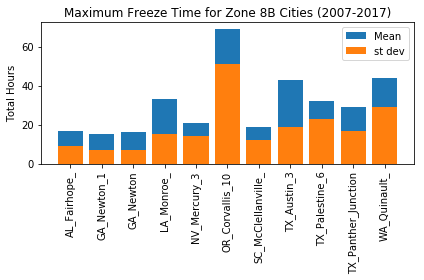

In [449]:
ax = plt.subplot()
ax.bar(x,max_ext_fr_8b,label='Mean')
ax.bar(x,max_ext_fr_sd_8b,label='st dev')
plt.xticks(x,cities_8b,rotation = 90)

plt.legend()
plt.title("Maximum Freeze Time for Zone 8B Cities (2007-2017)")
plt.ylabel("Total Hours") 
plt.tight_layout()
plt.savefig('8B_max_fr.png')
plt.show()

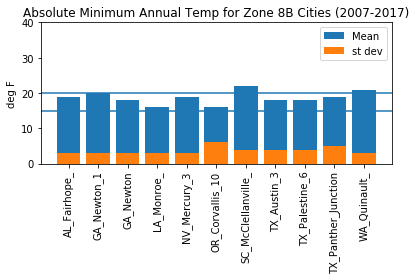

In [450]:
ax = plt.subplot()
ax.bar(x,min_temp_8b,label='Mean')
ax.bar(x,min_temp_sd_8b,label='st dev')
plt.xticks(x,cities_8b,rotation = 90)

plt.legend()
plt.title("Absolute Minimum Annual Temp for Zone 8B Cities (2007-2017)")
plt.ylabel("deg F")
plt.ylim(0,40)
plt.axhline(15)
plt.axhline(20)
plt.tight_layout()
plt.savefig('8B_abs_min.png')
plt.show()

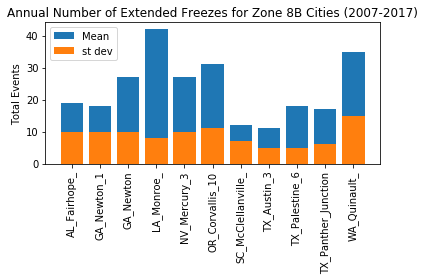

In [454]:
ax = plt.subplot()
ax.bar(x,no_ext_fr_8b,label='Mean')
ax.bar(x,no_ext_fr_sd_8b,label='st dev')
plt.xticks(x,cities_8b,rotation = 90)

plt.legend()
plt.title("Annual Number of Extended Freezes for Zone 8B Cities (2007-2017)")
plt.ylabel("Total Events")
plt.tight_layout()
plt.savefig('8B_ext_fr.png')
plt.show()

In [272]:
no_ext_fr_8b = list(merged_df['Number of Extended Freezes (mean)'])
no_ext_fr_sd_8b = list(merged_df['Number of Extended Freezes (stdev)'])

,City,USDA Zone Historical
0,NC_Asheville_13_S,7A
1,NC_Asheville_8_SSW,7A
2,MT_Wolf_Point_34_NE,3B
3,RI_Kingston_1_W,6B
4,RI_Kingston_1_NW,6B
5,NH_Durham_2_N,5B
6,MT_Wolf_Point_29_ENE,3B
7,NH_Durham_2_SSW,5B
8,SC_Blackville_3_W,8A
9,OK_Stillwater_2_W,7A


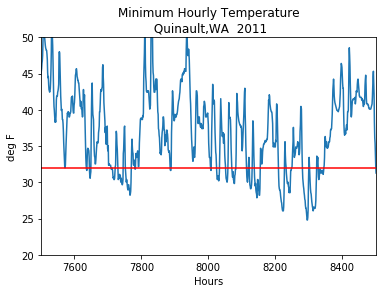

In [378]:
# Generate snapshot for Austin 2016:
path = 'CRNH0203-201801010550\2011'

file = "CRNH0203-2011-WA_Quinault_4_NE.txt"
atx_file_df = pd.read_table(file,header=None, delim_whitespace = True )


header_str = "WBANNO UTC_DATE UTC_TIME LST_DATE LST_TIME CRX_VN LONGITUDE LATITUDE T_CALC T_HR_AVG T_MAX T_MIN P_CALC SOLARAD SOLARAD_FLAG SOLARAD_MAX SOLARAD_MAX_FLAG SOLARAD_MIN SOLARAD_MIN_FLAG SUR_TEMP_TYPE SUR_TEMP SUR_TEMP_FLAG SUR_TEMP_MAX SUR_TEMP_MAX_FLAG SUR_TEMP_MIN SUR_TEMP_MIN_FLAG RH_HR_AVG RH_HR_AVG_FLAG SOIL_MOISTURE_5 SOIL_MOISTURE_10 SOIL_MOISTURE_20 SOIL_MOISTURE_50 SOIL_MOISTURE_100 SOIL_TEMP_5 SOIL_TEMP_10 SOIL_TEMP_20 SOIL_TEMP_50 SOIL_TEMP_100"
headers =header_str.split(" ")
atx_file_df.columns =headers 
atx_file_df=atx_file_df[atx_file_df['T_MIN'] > -100]
atx_file_df['T_MIN_F']=atx_file_df['T_MIN']*9/5 +32

plt.plot(atx_file_df["T_MIN_F"])
plt.xlabel("Hours")
plt.ylabel("deg F")
plt.title("Minimum Hourly Temperature\n Quinault,WA  2011")
plt.axhline(y=32, xmin=0, xmax=9000, hold=None, color ='red')
#plt.axvline(x=123, color='red')
#plt.axvline(x=163, color='red')
plt.ylim(20,50)
plt.xlim(7500,8500)
plt.savefig("qwa_2011_min.png")
plt.show()

In [363]:
eight_b_df.tail(100)

,City,Count,USDA Zone Historical,Year,Total_Freeze_Time,Max_Extended_Freeze_Time,Number of Extended Freezes,Minimum_Temperature,USDA Zone Measured
454,LA_Monroe_26_N,15,8B,2004,443,22,41,17,8B
455,LA_Monroe_26_N,15,8B,2005,384,16,41,16,8B
456,LA_Monroe_26_N,15,8B,2006,491,47,49,13,8A
457,LA_Monroe_26_N,15,8B,2007,454,19,48,18,8B
458,LA_Monroe_26_N,15,8B,2008,522,28,54,13,8A
459,LA_Monroe_26_N,15,8B,2009,374,19,38,18,8B
460,LA_Monroe_26_N,15,8B,2010,603,71,48,13,8A
461,LA_Monroe_26_N,15,8B,2011,561,45,46,13,8A
462,LA_Monroe_26_N,15,8B,2012,362,16,41,18,8B
463,LA_Monroe_26_N,15,8B,2013,464,41,50,21,9A
